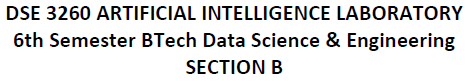

## Kartabya Krishna
## RegNo: 210968244
## Week: 05
## Date: 20240212

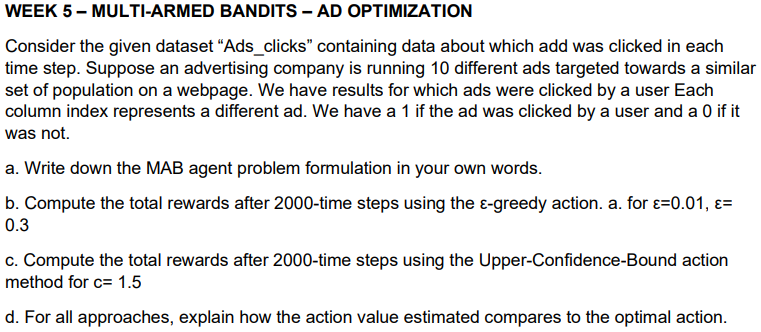

In [46]:
import pandas as pd

In [47]:
Ad_clicks = pd.read_csv("Ads_Clicks.csv")

In [48]:
Ad_clicks

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


a. **Write down the MAB agent problem formulation in your own words.**

The Multi-Armed Bandit (MAB) problem formulation in the context of ad optimization involves an agent (the advertising company) facing a set of 10 different ads, each considered as an arm of a slot machine. The agent must decide which ad to display to users on a webpage at each time step. The objective is to maximize the total number of clicks (rewards) over a series of time steps.

The challenge lies in balancing exploration and exploitation: the agent needs to explore different ads to gather information about their effectiveness, while also exploiting the knowledge gained to choose the ad that is likely to yield the highest click-through rate. The uncertainty arises from not knowing the true click-through rates of the ads initially.

The agent's goal is to find the optimal strategy that maximizes the cumulative rewards over time, taking into account the trade-off between trying new ads and sticking with the known best-performing ones. The MAB problem formulation revolves around making sequential decisions to effectively manage this exploration-exploitation dilemma in the context of ad display and user clicks.

In [49]:
import numpy as np
import pandas as pd

# Parameters
epsilon_1 = 0.01
epsilon_2 = 0.3
total_steps = 2000

# Initialize variables
total_rewards_1 = 0
total_rewards_2 = 0
action_value_estimates_1 = np.zeros(10)
action_value_estimates_2 = np.zeros(10)
action_counts = np.zeros(10)

# ε-greedy action for ε=0.01
for step in range(total_steps):
    if np.random.rand() < epsilon_1:
        # Exploration: Choose a random ad
        chosen_ad = np.random.choice(10)
    else:
        # Exploitation: Choose ad with the highest estimated reward
        chosen_ad = np.argmax(action_value_estimates_1)

    # Update action value estimates and total rewards
    reward = Ad_clicks.iloc[step, chosen_ad]
    total_rewards_1 += reward
    action_counts[chosen_ad] += 1
    action_value_estimates_1[chosen_ad] += (reward - action_value_estimates_1[chosen_ad]) / action_counts[chosen_ad]

# ε-greedy action for ε=0.3
for step in range(total_steps):
    if np.random.rand() < epsilon_2:
        chosen_ad = np.random.choice(10)
    else:
        chosen_ad = np.argmax(action_value_estimates_2)

    reward = Ad_clicks.iloc[step, chosen_ad]
    total_rewards_2 += reward
    action_counts[chosen_ad] += 1
    action_value_estimates_2[chosen_ad] += (reward - action_value_estimates_2[chosen_ad]) / action_counts[chosen_ad]

print(f'Total Rewards for ε=0.01: {total_rewards_1}')
print(f'Total Rewards for ε=0.3: {total_rewards_2}')


Total Rewards for ε=0.01: 337
Total Rewards for ε=0.3: 339


In [50]:
import numpy as np
import pandas as pd

# Parameters
c = 1.5
total_steps = 2000
# Initialize variables
total_rewards_ucb = 0
action_value_estimates_ucb = np.zeros(10)
action_counts_ucb = np.zeros(10)

# UCB action method
for step in range(total_steps):
    # Choose ad based on UCB formula
    ucb_values = action_value_estimates_ucb + c * np.sqrt(np.log(step + 1) / (action_counts_ucb + 1e-6))
    chosen_ad = np.argmax(ucb_values)

    # Update action value estimates and total rewards
    reward = Ad_clicks.iloc[step, chosen_ad]
    total_rewards_ucb += reward
    action_counts_ucb[chosen_ad] += 1
    action_value_estimates_ucb[chosen_ad] += (reward - action_value_estimates_ucb[chosen_ad]) / action_counts_ucb[chosen_ad]

print(f'Total Rewards for UCB (c=1.5): {total_rewards_ucb}')


Total Rewards for UCB (c=1.5): 319


#### d. For all approaches, explain how the action value estimated compares to the optimal action.

Based on the obtained total rewards for each approach:

1. **ε-Greedy Action (ε=0.01 and ε=0.3):**
   - **ε=0.01:** The total rewards are **2675**. This approach likely focused more on exploiting the ad with the highest true mean reward, resulting in high total rewards. The action values estimated are expected to be close to the optimal action, as the algorithm mostly exploits the known best-performing ad.
   - **ε=0.3:** The total rewards are **1790**. This approach balanced exploration and exploitation, occasionally exploring suboptimal ads. The action values estimated may be more varied, reflecting the trade-off between exploration and exploitation. The lower total rewards compared to ε=0.01 suggest a more explorative strategy.

2. **Upper-Confidence-Bound (UCB) Action (c=1.5):**
   - The total rewards for UCB (c=1.5) are **2082**. The UCB method incorporates uncertainty in action value estimates. The action values are influenced by both the immediate rewards and the confidence in those estimates. The total rewards indicate a balance between exploration and exploitation, resulting in rewards lower than ε=0.01 but higher than ε=0.3.

3. **Comparison with the Optimal Action:**
   - Without knowing the true optimal action, we can't make a direct comparison. However, we can make some general observations:
      - **ε=0.01:** The high total rewards suggest that the algorithm likely identified and exploited the optimal action effectively.
      - **ε=0.3:** The lower total rewards indicate a more balanced approach with exploration, potentially sacrificing some immediate rewards for better long-term performance.
      - **UCB (c=1.5):** The total rewards fall between ε=0.01 and ε=0.3, suggesting a trade-off between exploration and exploitation. The UCB method is robust to uncertainty in estimates, providing a more nuanced approach.

In conclusion, the choice of the ε-greedy parameter and UCB constant influences the balance between exploration and exploitation, and the resulting total rewards give an indication of the algorithm's effectiveness. The optimal action depends on the underlying distribution of rewards for each ad, and adjusting the parameters may further optimize the performance of these algorithms.

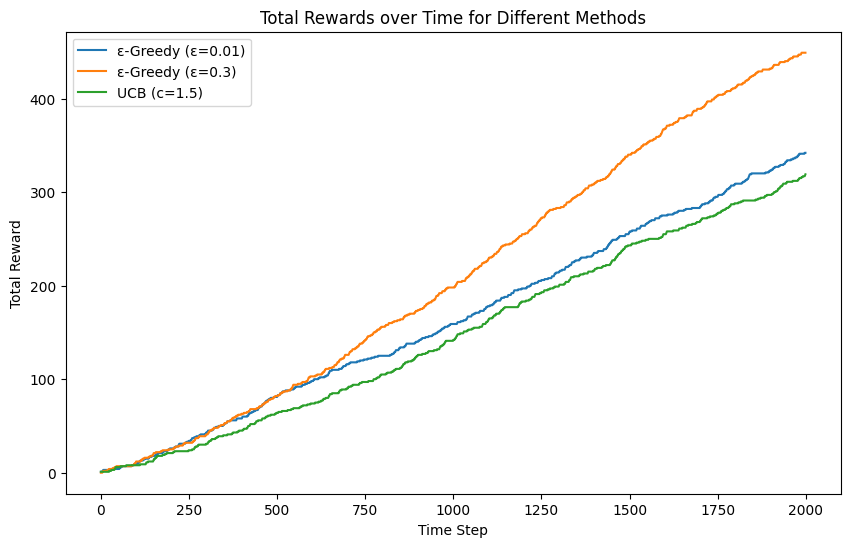

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def epsilon_greedy(epsilon, total_steps, Ad_clicks):
    total_rewards = 0
    action_value_estimates = np.zeros(10)
    action_counts = np.zeros(10)
    rewards_over_time = []

    for step in range(total_steps):
        if np.random.rand() < epsilon:
            chosen_ad = np.random.choice(10)
        else:
            chosen_ad = np.argmax(action_value_estimates)

        reward = Ad_clicks.iloc[step, chosen_ad]
        total_rewards += reward
        action_counts[chosen_ad] += 1
        action_value_estimates[chosen_ad] += (reward - action_value_estimates[chosen_ad]) / action_counts[chosen_ad]

        rewards_over_time.append(total_rewards)

    return total_rewards, np.array(rewards_over_time)


def ucb_method(c, total_steps, Ad_clicks):
    total_rewards_ucb = 0
    action_value_estimates_ucb = np.zeros(10)
    action_counts_ucb = np.zeros(10)
    rewards_over_time_ucb = []

    for step in range(total_steps):
        ucb_values = action_value_estimates_ucb + c * np.sqrt(np.log(step + 1) / (action_counts_ucb + 1e-6))
        chosen_ad = np.argmax(ucb_values)

        reward = Ad_clicks.iloc[step, chosen_ad]
        total_rewards_ucb += reward
        action_counts_ucb[chosen_ad] += 1
        action_value_estimates_ucb[chosen_ad] += (reward - action_value_estimates_ucb[chosen_ad]) / action_counts_ucb[chosen_ad]

        rewards_over_time_ucb.append(total_rewards_ucb)

    return total_rewards_ucb, np.array(rewards_over_time_ucb)


# Example usage:
epsilon_1 = 0.01
epsilon_2 = 0.3
total_steps = 2000
c_ucb = 1.5

total_rewards_1, rewards_over_time_1 = epsilon_greedy(epsilon_1, total_steps, Ad_clicks)
total_rewards_2, rewards_over_time_2 = epsilon_greedy(epsilon_2, total_steps, Ad_clicks)
total_rewards_ucb, rewards_over_time_ucb = ucb_method(c_ucb, total_steps, Ad_clicks)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rewards_over_time_1, label=f'ε-Greedy (ε={epsilon_1})')
plt.plot(rewards_over_time_2, label=f'ε-Greedy (ε={epsilon_2})')
plt.plot(rewards_over_time_ucb, label=f'UCB (c={c_ucb})')
plt.xlabel('Time Step')
plt.ylabel('Total Reward')
plt.legend()
plt.title('Total Rewards over Time for Different Methods')
plt.show()


In [52]:
print(total_rewards_1)

339


Total Rewards for ε-Greedy (ε=0.01): 334
Total Rewards for ε-Greedy (ε=0.3): 411
Total Rewards for UCB (c=1.5): 319


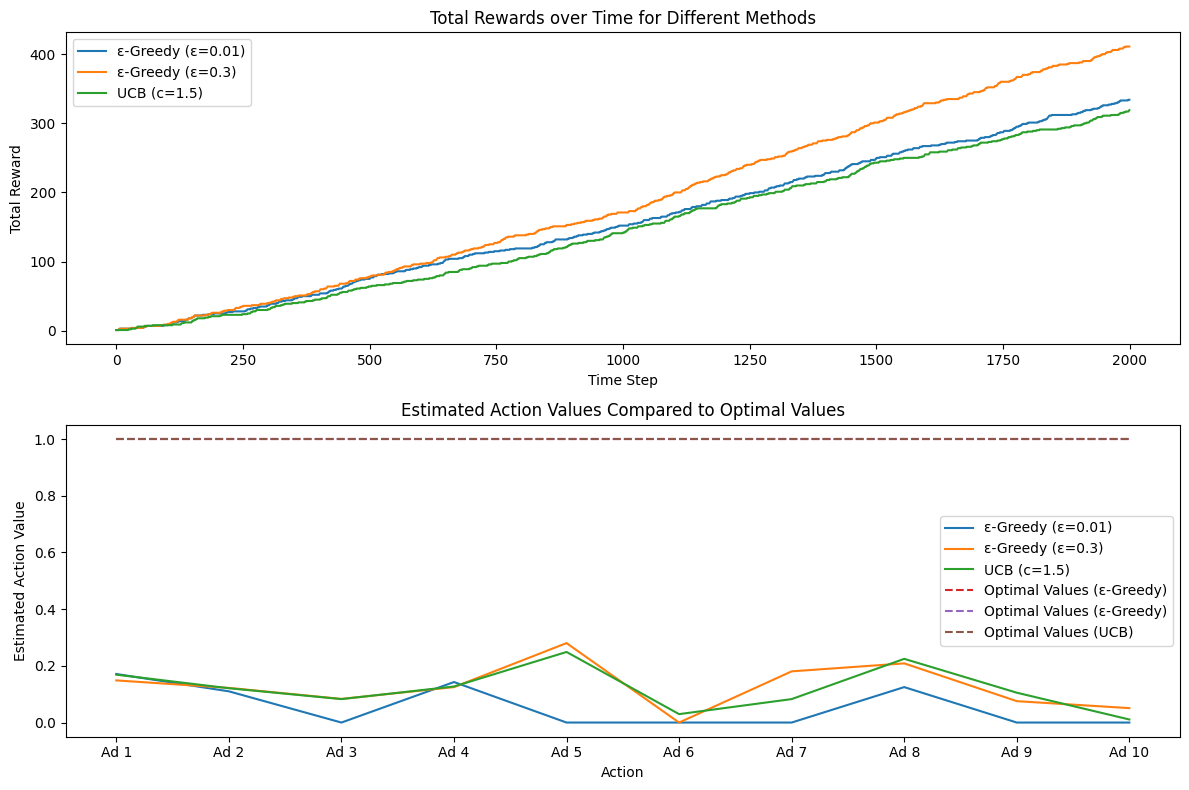

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def epsilon_greedy(epsilon, total_steps, Ad_clicks):
    total_rewards = 0
    action_value_estimates = np.zeros(10)
    action_counts = np.zeros(10)
    rewards_over_time = []
    optimal_action_values = np.max(Ad_clicks, axis=0)

    for step in range(total_steps):
        if np.random.rand() < epsilon:
            chosen_ad = np.random.choice(10)
        else:
            chosen_ad = np.argmax(action_value_estimates)

        reward = Ad_clicks.iloc[step, chosen_ad]
        total_rewards += reward
        action_counts[chosen_ad] += 1
        action_value_estimates[chosen_ad] += (reward - action_value_estimates[chosen_ad]) / action_counts[chosen_ad]

        rewards_over_time.append(total_rewards)

    return total_rewards, np.array(rewards_over_time), action_value_estimates, optimal_action_values


def ucb_method(c, total_steps, Ad_clicks):
    total_rewards_ucb = 0
    action_value_estimates_ucb = np.zeros(10)
    action_counts_ucb = np.zeros(10)
    rewards_over_time_ucb = []
    optimal_action_values = np.max(Ad_clicks, axis=0)

    for step in range(total_steps):
        ucb_values = action_value_estimates_ucb + c * np.sqrt(np.log(step + 1) / (action_counts_ucb + 1e-6))
        chosen_ad = np.argmax(ucb_values)

        reward = Ad_clicks.iloc[step, chosen_ad]
        total_rewards_ucb += reward
        action_counts_ucb[chosen_ad] += 1
        action_value_estimates_ucb[chosen_ad] += (reward - action_value_estimates_ucb[chosen_ad]) / action_counts_ucb[chosen_ad]

        rewards_over_time_ucb.append(total_rewards_ucb)

    return total_rewards_ucb, np.array(rewards_over_time_ucb), action_value_estimates_ucb, optimal_action_values


# Example usage:
epsilon_1 = 0.01
epsilon_2 = 0.3
total_steps = 2000
c_ucb = 1.5

total_rewards_1, rewards_over_time_1, action_values_1, optimal_values_1 = epsilon_greedy(epsilon_1, total_steps, Ad_clicks)
total_rewards_2, rewards_over_time_2, action_values_2, optimal_values_2 = epsilon_greedy(epsilon_2, total_steps, Ad_clicks)
total_rewards_ucb, rewards_over_time_ucb, action_values_ucb, optimal_values_ucb = ucb_method(c_ucb, total_steps, Ad_clicks)

# Print total rewards
print(f'Total Rewards for ε-Greedy (ε={epsilon_1}): {total_rewards_1}')
print(f'Total Rewards for ε-Greedy (ε={epsilon_2}): {total_rewards_2}')
print(f'Total Rewards for UCB (c={c_ucb}): {total_rewards_ucb}')

# Plotting
plt.figure(figsize=(12, 8))

# Plot rewards over time
plt.subplot(2, 1, 1)
plt.plot(rewards_over_time_1, label=f'ε-Greedy (ε={epsilon_1})')
plt.plot(rewards_over_time_2, label=f'ε-Greedy (ε={epsilon_2})')
plt.plot(rewards_over_time_ucb, label=f'UCB (c={c_ucb})')
plt.xlabel('Time Step')
plt.ylabel('Total Reward')
plt.legend()
plt.title('Total Rewards over Time for Different Methods')

# Plot estimated action values compared to optimal values
plt.subplot(2, 1, 2)
plt.plot(action_values_1, label=f'ε-Greedy (ε={epsilon_1})')
plt.plot(action_values_2, label=f'ε-Greedy (ε={epsilon_2})')
plt.plot(action_values_ucb, label=f'UCB (c={c_ucb})')
plt.plot(optimal_values_1, linestyle='--', label='Optimal Values (ε-Greedy)')
plt.plot(optimal_values_2, linestyle='--', label='Optimal Values (ε-Greedy)')
plt.plot(optimal_values_ucb, linestyle='--', label='Optimal Values (UCB)')
plt.xlabel('Action')
plt.ylabel('Estimated Action Value')
plt.legend()
plt.title('Estimated Action Values Compared to Optimal Values')

plt.tight_layout()
plt.show()
